# Feature Engineering from Sentimental Word Count
## Conducted on a dataset of just 20,000 reviews: Half Real, Half Fake

In [1]:
import pandas as pd

In [2]:
#Just a dictionary consisting of a large collection of all the sentimental words
sentimental_words = pd.read_table("...sentiment_words.txt", sep="\n", header=None)

In [4]:
sentimental_words.head()
sentimental_words.shape

(6789, 1)

In [5]:
review = pd.read_table("...YelpNYC\\reviewContent", header=None)
meta = pd.read_table("...YelpNYC\\metadata", header=None)

In [9]:
review.shape
meta.shape
meta.head()

,0,1,2,3,4
0,923,0,3.0,-1,2014-12-08
1,924,0,3.0,-1,2013-05-16
2,925,0,4.0,-1,2013-07-01
3,926,0,4.0,-1,2011-07-28
4,927,0,4.0,-1,2010-11-01


In [10]:
data = pd.merge(review, meta, left_on=[0,1,2], right_on=[0, 1, 4], how = 'inner')
print(data.shape)
print(data.head())

(358957, 8)
     0  1           2         2_x  \
0  923  0  2014-12-08  2014-12-08   
1  924  0  2013-05-16  2013-05-16   
2  925  0  2013-07-01  2013-07-01   
3  926  0  2011-07-28  2011-07-28   
4  927  0  2010-11-01  2010-11-01   

                                                 3_x  2_y  3_y           4  
0  The food at snack is a selection of popular Gr...  3.0   -1  2014-12-08  
1  This little place in Soho is wonderful. I had ...  3.0   -1  2013-05-16  
2  ordered lunch for 15 from Snack last Friday.  ...  4.0   -1  2013-07-01  
3  This is a beautiful quaint little restaurant o...  4.0   -1  2011-07-28  
4  Snack is great place for a  casual sit down lu...  4.0   -1  2010-11-01  


In [11]:
data.head()

,0,1,2,2_x,3_x,2_y,3_y,4
0,923,0,2014-12-08,2014-12-08,The food at snack is a selection of popular Gr...,3.0,-1,2014-12-08
1,924,0,2013-05-16,2013-05-16,This little place in Soho is wonderful. I had ...,3.0,-1,2013-05-16
2,925,0,2013-07-01,2013-07-01,ordered lunch for 15 from Snack last Friday. ...,4.0,-1,2013-07-01
3,926,0,2011-07-28,2011-07-28,This is a beautiful quaint little restaurant o...,4.0,-1,2011-07-28
4,927,0,2010-11-01,2010-11-01,Snack is great place for a casual sit down lu...,4.0,-1,2010-11-01


In [70]:
data.drop('2_x', axis=1, inplace=True)
data.drop(4, axis=1, inplace=True)

In [72]:
data.columns = ['user_id','items','date', 'text', 'rating', 'real']
data.columns

In [16]:
data.head()

,user_id,items,date,text,rating,real
0,923,0,2014-12-08,The food at snack is a selection of popular Gr...,3.0,-1
1,924,0,2013-05-16,This little place in Soho is wonderful. I had ...,3.0,-1
2,925,0,2013-07-01,ordered lunch for 15 from Snack last Friday. ...,4.0,-1
3,926,0,2011-07-28,This is a beautiful quaint little restaurant o...,4.0,-1
4,927,0,2010-11-01,Snack is great place for a casual sit down lu...,4.0,-1


In [17]:
data.groupby('real').count()

,user_id,items,date,text,rating
real,,,,,
-1,36860,36860,36860,36860,36860
1,322097,322097,322097,322097,322097


In [18]:
real = data[data['real'] == 1].iloc[0:10000,:]
fake = data[data['real'] == -1].iloc[0:10000,:]
print(real.shape, fake.shape)

(10000, 6) (10000, 6)


In [22]:
data = pd.concat([real, fake], axis = 0)

In [23]:
data.shape

(20000, 6)

In [24]:
data.head()

,user_id,items,date,text,rating,real
14,937,0,2014-10-15,"Tiny little place, but very good food. Pastits...",4.0,1
15,938,0,2014-10-10,I had the braised lamb sandwich and was one of...,5.0,1
16,939,0,2014-10-03,This spot is close to my job so I decided to c...,3.0,1
17,940,0,2014-09-16,"For lunch, my friend and I had: -Lamb sandwich...",4.0,1
18,941,0,2014-08-10,"Needed a quick, healthy light ""lunch"" and this...",5.0,1


In [43]:
#Return count of sentimental words in a sentence
def count_sentiment(sentence):
    sentence = sentence.lower()
    count = 0
    for word in sentence.split():
        for sent_word in sentimental_words[0]:
            if sent_word in word:
                count += 1
    return count

In [44]:
import tqdm
tqdm.tqdm.pandas()
data['sentimental_words'] = data['text'].progress_apply(lambda txt: count_sentiment(txt))


  2%|█▌                                                                            | 413/20000 [00:08<07:26, 43.90it/s]


  4%|███▎                                                                          | 835/20000 [00:17<07:31, 42.46it/s]


  6%|████▋                                                                        | 1226/20000 [00:26<09:39, 32.38it/s]


  8%|██████                                                                       | 1578/20000 [00:36<06:33, 46.81it/s]


 10%|███████▍                                                                     | 1928/20000 [00:45<08:07, 37.10it/s]


 11%|████████▋                                                                    | 2271/20000 [00:54<06:38, 44.50it/s]


 13%|██████████▎                                                                  | 2683/20000 [01:03<04:53, 58.96it/s]


 15%|███████████▋                                                                 | 3028/20000 [01:13<14:49, 19.08it/s]


 17%|████████████▋                                                                | 3302/20000 [01:24<13:13, 21.04it/s]


 18%|█████████████▌                                                               | 3535/20000 [01:35<15:05, 18.18it/s]


 19%|██████████████▊                                                              | 3838/20000 [01:45<06:28, 41.55it/s]


 21%|███████████████▉                                                             | 4129/20000 [01:55<06:13, 42.51it/s]


 22%|█████████████████▏                                                           | 4450/20000 [02:04<10:30, 24.65it/s]


 24%|██████████████████▎                                                          | 4764/20000 [02:14<07:45, 32.70it/s]


 25%|███████████████████▍                                                         | 5050/20000 [02:24<06:01, 41.31it/s]


 27%|████████████████████▉                                                        | 5449/20000 [02:33<05:32, 43.77it/s]


 29%|██████████████████████▍                                                      | 5828/20000 [02:43<05:30, 42.85it/s]


 31%|███████████████████████▉                                                     | 6214/20000 [02:52<07:27, 30.77it/s]


 33%|█████████████████████████▍                                                   | 6597/20000 [03:01<05:37, 39.70it/s]


 35%|██████████████████████████▉                                                  | 7001/20000 [03:10<04:59, 43.37it/s]


 37%|████████████████████████████▏                                                | 7333/20000 [03:20<04:57, 42.63it/s]


 38%|█████████████████████████████▌                                               | 7685/20000 [03:29<04:05, 50.25it/s]


 41%|███████████████████████████████▏                                             | 8102/20000 [03:38<05:25, 36.50it/s]


 42%|████████████████████████████████▍                                            | 8427/20000 [03:48<05:28, 35.24it/s]


 44%|█████████████████████████████████▋                                           | 8766/20000 [03:57<06:44, 27.75it/s]


 45%|██████████████████████████████████▉                                          | 9088/20000 [04:07<06:08, 29.64it/s]


 47%|████████████████████████████████████▏                                        | 9401/20000 [04:17<06:19, 27.93it/s]


 48%|█████████████████████████████████████▎                                       | 9685/20000 [04:28<04:19, 39.81it/s]


 50%|██████████████████████████████████████▎                                     | 10096/20000 [04:38<04:01, 40.96it/s]


 53%|████████████████████████████████████████▎                                   | 10603/20000 [04:47<02:57, 53.06it/s]


 56%|██████████████████████████████████████████▏                                 | 11115/20000 [04:57<02:19, 63.83it/s]


 58%|████████████████████████████████████████████▏                               | 11616/20000 [05:06<02:16, 61.43it/s]


 61%|██████████████████████████████████████████████▎                             | 12182/20000 [05:17<02:55, 44.55it/s]


 64%|████████████████████████████████████████████████▍                           | 12763/20000 [05:26<03:05, 38.91it/s]


 67%|██████████████████████████████████████████████████▊                         | 13364/20000 [05:35<01:34, 70.56it/s]


 69%|████████████████████████████████████████████████████▋                       | 13879/20000 [05:45<01:50, 55.30it/s]


 72%|██████████████████████████████████████████████████████▉                     | 14441/20000 [05:54<01:44, 53.41it/s]


 75%|████████████████████████████████████████████████████████▊                   | 14967/20000 [06:04<01:15, 66.63it/s]


 78%|██████████████████████████████████████████████████████████▉                 | 15508/20000 [06:13<01:20, 55.59it/s]


 80%|█████████████████████████████████████████████████████████████               | 16062/20000 [06:22<01:11, 55.45it/s]


 83%|███████████████████████████████████████████████████████████████             | 16588/20000 [06:32<01:26, 39.44it/s]


 85%|████████████████████████████████████████████████████████████████▉           | 17088/20000 [06:42<01:10, 41.55it/s]


 88%|██████████████████████████████████████████████████████████████████▊         | 17593/20000 [06:51<00:46, 51.98it/s]


 91%|█████████████████████████████████████████████████████████████████████       | 18159/20000 [07:00<00:23, 77.15it/s]


 93%|██████████████████████████████████████████████████████████████████████▉     | 18683/20000 [07:09<00:20, 64.51it/s]


 96%|████████████████████████████████████████████████████████████████████████▉   | 19195/20000 [07:19<00:11, 70.23it/s]


 99%|██████████████████████████████████████████████████████████████████████████▉ | 19717/20000 [07:28<00:03, 77.90it/s]


100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [07:32<00:00, 44.15it/s]

In [45]:
data.head()

,user_id,items,date,text,rating,real,sentimental_words
14,937,0,2014-10-15,"Tiny little place, but very good food. Pastits...",4.0,1,2
15,938,0,2014-10-10,I had the braised lamb sandwich and was one of...,5.0,1,5
16,939,0,2014-10-03,This spot is close to my job so I decided to c...,3.0,1,23
17,940,0,2014-09-16,"For lunch, my friend and I had: -Lamb sandwich...",4.0,1,14
18,941,0,2014-08-10,"Needed a quick, healthy light ""lunch"" and this...",5.0,1,9


In [69]:
data.groupby('rating').mean()

,user_id,items,real,sentimental_words
rating,,,,
1.0,27019.587338,172.768116,-0.493516,21.923722
2.0,21762.006267,157.813787,-0.108326,21.675918
3.0,16124.268293,129.402200,0.213773,20.319464
4.0,16989.721043,120.712401,0.131595,18.129927
5.0,19681.219471,157.053123,-0.061564,18.157231


## This matrix plot got a little screwed due to some changes to the code in the upper region. Refer the matrix at the end

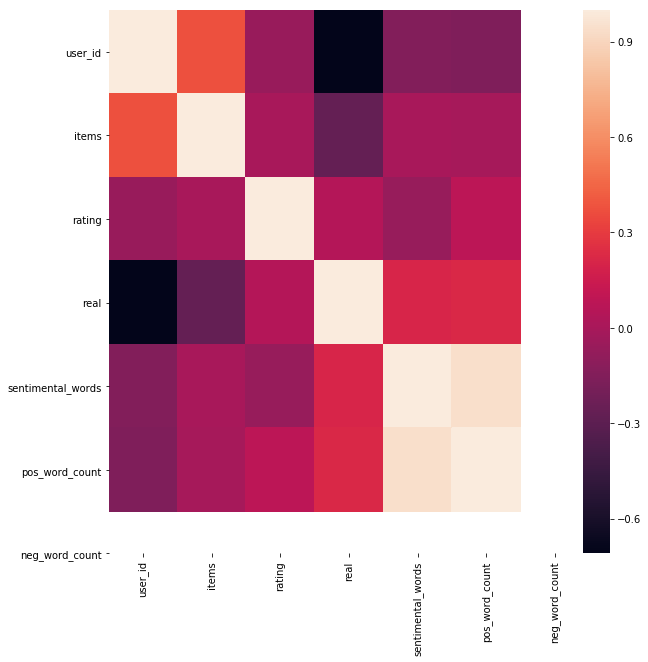

In [100]:
import seaborn as sns

data1 = data.drop('pos_word_count', axis=1)
data1 = data.drop('neg_word_count', axis=1)
plt.figure(figsize=(10, 10))
sns.heatmap(data1.corr(),xticklabels=corr.columns.values,yticklabels=corr.columns.values)

# NO CORRELATION!
# FML!
# How about splitting the sentiment_words into sentiment_positive and sentiment_negative

In [74]:
positive_words = pd.read_table("C:\\Users\\elonm\\Desktop\\positive.txt", header = None)
negative_words = pd.read_table("C:\\Users\\elonm\\Desktop\\negative.txt", header = None)
positive_words.head()

,0
0,a+
1,abound
2,abounds
3,abundance
4,abundant


In [75]:
#Return count of sentimental words in a sentence - WITH A LITTLE MODIFICATION

def count_sentiment_pos(sentence):
    sentence = sentence.lower()
    count = 0
    for word in sentence.split():
        for sent_word in positive_words[0]:
            if sent_word in word:
                count += 1
    return count

def count_sentiment_neg(sentence):
    sentence = sentence.lower()
    count = 0
    for word in sentence.split():
        for sent_word in negative_words[0]:
            if sent_word in word:
                count += 1
    return count

In [76]:
tqdm.tqdm.pandas()
data['pos_word_count'] = data['text'].progress_apply(lambda txt: count_sentiment_pos(txt))


  4%|███▍                                                                          | 890/20000 [00:07<03:16, 97.03it/s]


  9%|██████▌                                                                     | 1742/20000 [00:16<02:50, 107.29it/s]


 13%|█████████▌                                                                  | 2518/20000 [00:24<02:34, 113.22it/s]


 16%|████████████▍                                                                | 3242/20000 [00:33<03:57, 70.67it/s]


 19%|██████████████▌                                                              | 3775/20000 [00:42<02:51, 94.66it/s]


 22%|█████████████████▏                                                           | 4454/20000 [00:50<03:35, 72.18it/s]


 26%|███████████████████▌                                                        | 5158/20000 [00:59<01:50, 134.37it/s]


 30%|██████████████████████▉                                                     | 6032/20000 [01:07<02:00, 115.87it/s]


 34%|██████████████████████████▏                                                 | 6885/20000 [01:15<01:49, 120.23it/s]


 38%|█████████████████████████████▏                                              | 7683/20000 [01:24<01:33, 131.77it/s]


 43%|████████████████████████████████▊                                            | 8521/20000 [01:32<02:11, 87.48it/s]


 46%|███████████████████████████████████▎                                         | 9171/20000 [01:41<02:12, 81.85it/s]


 49%|█████████████████████████████████████▊                                       | 9822/20000 [01:49<01:42, 99.17it/s]


 54%|████████████████████████████████████████▌                                  | 10825/20000 [01:58<01:18, 116.62it/s]


 59%|█████████████████████████████████████████████▏                              | 11882/20000 [02:07<01:33, 87.05it/s]


 66%|█████████████████████████████████████████████████▌                         | 13231/20000 [02:16<00:40, 166.72it/s]


 72%|█████████████████████████████████████████████████████▉                     | 14381/20000 [02:25<00:42, 132.68it/s]


 77%|█████████████████████████████████████████████████████████▊                 | 15423/20000 [02:34<00:41, 110.21it/s]


 83%|█████████████████████████████████████████████████████████████▉             | 16508/20000 [02:42<00:23, 151.43it/s]


 88%|█████████████████████████████████████████████████████████████████▊         | 17542/20000 [02:51<00:17, 138.87it/s]


 94%|██████████████████████████████████████████████████████████████████████▏    | 18729/20000 [02:59<00:08, 154.27it/s]


 99%|██████████████████████████████████████████████████████████████████████████▍| 19851/20000 [03:08<00:01, 138.96it/s]


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [03:09<00:00, 105.71it/s]

In [78]:
tqdm.tqdm.pandas()
data['neg_word_count'] = data['text'].progress_apply(lambda txt: count_sentiment_neg(txt))


  2%|█▊                                                                            | 462/20000 [00:08<07:51, 41.46it/s]


  5%|███▌                                                                          | 925/20000 [00:17<06:03, 52.45it/s]


  7%|█████▎                                                                       | 1367/20000 [00:26<08:57, 34.65it/s]


  9%|██████▉                                                                      | 1791/20000 [00:35<07:14, 41.91it/s]


 11%|████████▎                                                                    | 2153/20000 [00:44<05:27, 54.53it/s]


 13%|█████████▉                                                                   | 2592/20000 [00:54<05:10, 56.11it/s]


 15%|███████████▋                                                                 | 3021/20000 [01:04<12:25, 22.78it/s]


 17%|████████████▋                                                                | 3311/20000 [01:14<09:49, 28.29it/s]


 18%|█████████████▊                                                               | 3575/20000 [01:24<12:10, 22.48it/s]


 20%|███████████████                                                              | 3922/20000 [01:34<07:54, 33.91it/s]


 21%|████████████████▎                                                            | 4252/20000 [01:44<08:05, 32.43it/s]


 23%|█████████████████▊                                                           | 4625/20000 [01:53<10:03, 25.49it/s]


 25%|██████████████████▉                                                          | 4917/20000 [02:03<13:14, 18.99it/s]


 27%|████████████████████▊                                                        | 5398/20000 [02:12<06:49, 35.66it/s]


 29%|██████████████████████▎                                                      | 5808/20000 [02:21<03:46, 62.54it/s]


 31%|████████████████████████                                                     | 6262/20000 [02:31<05:56, 38.58it/s]


 34%|██████████████████████████                                                   | 6757/20000 [02:39<03:57, 55.69it/s]


 36%|███████████████████████████▌                                                 | 7173/20000 [02:48<05:42, 37.49it/s]


 38%|█████████████████████████████                                                | 7553/20000 [02:57<06:35, 31.45it/s]


 40%|███████████████████████████████                                              | 8070/20000 [03:06<03:04, 64.60it/s]


 42%|████████████████████████████████▌                                            | 8443/20000 [03:15<04:44, 40.68it/s]


 44%|█████████████████████████████████▉                                           | 8826/20000 [03:24<04:13, 44.07it/s]


 46%|███████████████████████████████████▎                                         | 9187/20000 [03:35<08:09, 22.07it/s]


 47%|████████████████████████████████████▌                                        | 9492/20000 [03:45<07:22, 23.77it/s]


 49%|█████████████████████████████████████▉                                       | 9849/20000 [03:54<04:34, 36.99it/s]


 51%|███████████████████████████████████████                                     | 10283/20000 [04:04<03:19, 48.78it/s]


 54%|█████████████████████████████████████████▏                                  | 10831/20000 [04:14<03:22, 45.30it/s]


 57%|███████████████████████████████████████████▎                                | 11385/20000 [04:24<02:15, 63.58it/s]


 60%|█████████████████████████████████████████████▊                              | 12043/20000 [04:33<02:10, 60.99it/s]


 63%|████████████████████████████████████████████████                            | 12663/20000 [04:43<01:45, 69.25it/s]


 66%|██████████████████████████████████████████████████▎                         | 13234/20000 [04:53<02:07, 53.06it/s]


 69%|████████████████████████████████████████████████████▍                       | 13801/20000 [05:02<02:14, 46.02it/s]


 72%|██████████████████████████████████████████████████████▊                     | 14415/20000 [05:11<01:57, 47.54it/s]


 75%|████████████████████████████████████████████████████████▋                   | 14906/20000 [05:21<01:17, 65.73it/s]


 77%|██████████████████████████████████████████████████████████▊                 | 15484/20000 [05:30<01:36, 46.59it/s]


 80%|█████████████████████████████████████████████████████████████               | 16068/20000 [05:39<00:58, 67.75it/s]


 83%|███████████████████████████████████████████████████████████████             | 16606/20000 [05:49<01:23, 40.53it/s]


 86%|█████████████████████████████████████████████████████████████████▏          | 17144/20000 [05:58<00:54, 52.55it/s]


 89%|███████████████████████████████████████████████████████████████████▎        | 17719/20000 [06:08<00:33, 67.71it/s]


 92%|█████████████████████████████████████████████████████████████████████▉      | 18395/20000 [06:17<00:23, 68.67it/s]


 94%|███████████████████████████████████████████████████████████████████████▋    | 18876/20000 [06:27<00:38, 29.15it/s]


 97%|█████████████████████████████████████████████████████████████████████████▋  | 19376/20000 [06:36<00:09, 64.76it/s]


100%|███████████████████████████████████████████████████████████████████████████▊| 19941/20000 [06:46<00:00, 69.43it/s]


100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:46<00:00, 49.16it/s]

In [80]:
data.head()

,user_id,items,date,text,rating,real,sentimental_words,pos_word_count,neg_word_count
14,937,0,2014-10-15,"Tiny little place, but very good food. Pastits...",4.0,1,2,2,0
15,938,0,2014-10-10,I had the braised lamb sandwich and was one of...,5.0,1,5,4,1
16,939,0,2014-10-03,This spot is close to my job so I decided to c...,3.0,1,23,11,12
17,940,0,2014-09-16,"For lunch, my friend and I had: -Lamb sandwich...",4.0,1,14,8,6
18,941,0,2014-08-10,"Needed a quick, healthy light ""lunch"" and this...",5.0,1,9,7,2


In [86]:
data.groupby('rating').mean()

,user_id,items,real,sentimental_words,pos_word_count,neg_word_count
rating,,,,,,
1.0,27019.587338,172.768116,-0.493516,21.923722,7.911518,14.012204
2.0,21762.006267,157.813787,-0.108326,21.675918,9.589078,12.086840
3.0,16124.268293,129.402200,0.213773,20.319464,10.519847,9.799617
4.0,16989.721043,120.712401,0.131595,18.129927,10.908733,7.221195
5.0,19681.219471,157.053123,-0.061564,18.157231,11.337085,6.820146


# DRUMROLLS!

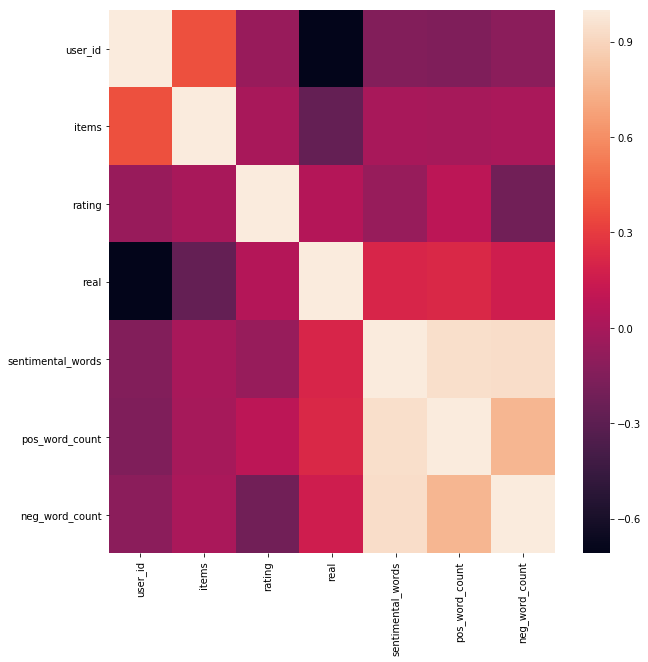

In [98]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(),xticklabels=corr.columns.values,yticklabels=corr.columns.values)

## NO STRONG CORRELATION OBSERVED!

# Scope: Try on a bigger dataset maybe?